El objetivo es introducir nuevos productos que tengan una buena posibilidad de ser disruptivos en una cadena de tiendas de tecnología. Para eso se quiere analizar el rendimiento actual de los productos vendidos.

In [19]:
#Se importan librerias
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Se parsea el xml
tree = ET.parse('ventas_electronicos.xml')
root = tree.getroot()

In [3]:
#Se extraen los datos a lista
data = []
for ingreso in root.findall(".//Venta"):
    record = {
        "VentaID": ingreso.find("VentaID").text,
        "Fecha": ingreso.find("Fecha").text,
        "Tienda": ingreso.find("Tienda").text,
        "Producto": ingreso.find("Producto").text,
        "Categoria": ingreso.find("Categoria").text,
        "Precio": ingreso.find("Precio").text,
        "Cantidad": ingreso.find("Cantidad").text,
        "Total": ingreso.find("Total").text
    }
    data.append(record)

In [4]:
#Se convierte la lista a df
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VentaID    200 non-null    object
 1   Fecha      200 non-null    object
 2   Tienda     200 non-null    object
 3   Producto   200 non-null    object
 4   Categoria  200 non-null    object
 5   Precio     200 non-null    object
 6   Cantidad   200 non-null    object
 7   Total      200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [6]:
df.head()

,VentaID,Fecha,Tienda,Producto,Categoria,Precio,Cantidad,Total
0,1,2025-04-03,DigitalStore Oeste,Smart TV LG 55',Televisores,1200.00,5,6000.00
1,2,2025-04-10,ElectroPlus Norte,Tablet iPad Air,Tablets,599.00,3,1797.00
2,3,2025-04-07,TecnoMarket Sur,Cámara Canon EOS M50,Fotografía,850.75,4,3403.00
3,4,2025-04-01,TecnoMarket Sur,Disco Duro Externo 2TB,Almacenamiento,89.95,3,269.85
4,5,2025-04-01,ElectroMax Centro,Cámara Canon EOS M50,Fotografía,850.75,5,4253.75


In [12]:
#Se convierte columnas con datos numericos a tipo correcto
df['VentaID'] = pd.to_numeric(df['VentaID'].astype('Int64'))
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Precio'] = pd.to_numeric(df['Precio'])
df['Cantidad'] = pd.to_numeric(df['Cantidad'].astype('Int64'))
df['Total'] = pd.to_numeric(df['Total'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   VentaID    200 non-null    Int64         
 1   Fecha      200 non-null    datetime64[ns]
 2   Tienda     200 non-null    object        
 3   Producto   200 non-null    object        
 4   Categoria  200 non-null    object        
 5   Precio     200 non-null    float64       
 6   Cantidad   200 non-null    Int64         
 7   Total      200 non-null    float64       
dtypes: Int64(2), datetime64[ns](1), float64(2), object(3)
memory usage: 13.0+ KB


In [17]:
#Se identifica la variedad de productos por categoría
df['Categoria'].value_counts().sort_values(ascending=False)

Categoria
Fotografía        29
Videojuegos       25
Almacenamiento    24
Smartphones       21
Laptops           20
Televisores       19
Redes             17
Monitores         17
Audio             15
Tablets           13
Name: count, dtype: int64

In [18]:
#Se calcula el precio promedio por cada categoría
df.groupby('Categoria')['Precio'].mean().sort_values(ascending=False)

Categoria
Televisores       1200.00
Laptops           1099.50
Fotografía         850.75
Smartphones        799.99
Tablets            599.00
Videojuegos        499.99
Audio              299.99
Monitores          249.99
Redes              189.99
Almacenamiento      89.95
Name: Precio, dtype: float64

In [31]:
#Se calcula el porcentaje de ventas por categoría
ventas_cat = df.groupby('Categoria')['Total'].sum()
total_ventas = df['Total'].sum()
porc_cat = (ventas_cat / total_ventas)*100
print(porc_cat)

Categoria
Almacenamiento     1.822012
Audio              3.579336
Fotografía        21.245730
Laptops           18.305166
Monitores          3.190859
Redes              2.477740
Smartphones       13.540715
Tablets            6.814561
Televisores       17.647546
Videojuegos       11.376335
Name: Total, dtype: float64


Text(0.5, 0, '%')

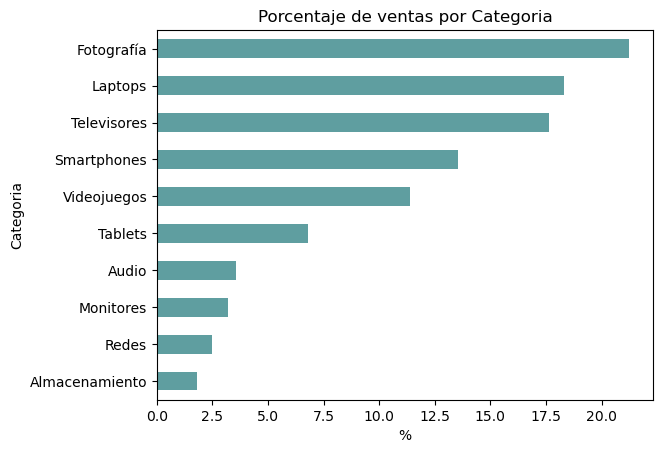

In [27]:
porc_cat.sort_values().plot(kind='barh', color='cadetblue')
plt.title('Porcentaje de ventas por Categoria')
plt.xlabel('%')

In [ ]:
La fotografía es la categoría lider en volumen y ventas, lo que nos indica una demanda constante que ha
sido satisfecha por la variedad de productos que se venden. 
La baja cantidad de ventas en Tablets  podría indicar una oportunidad para un producto disruptivo que redefina 
el uso de las tablets, quizás enfocándose en nichos específicos (educación, productividad móvil especializada) o integrándolas de formas novedosas con otros dispositivos.
